In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import math

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [3]:
df_raw=pd.read_csv("/Users/abhi011097/Workspace/Dataset_Analysis/2_Hr_Dataset_Analysis/Dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv.xls")
df=df_raw.copy()

### Structure Investigation

In [4]:
df.shape

(1470, 35)

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
pd.value_counts(df.dtypes)

int64     26
object     9
dtype: int64

### Structure of features

In [9]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
# how many unique values each non-numerical feature has and with which frequency the most prominent value is present.
df.describe(exclude="number")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


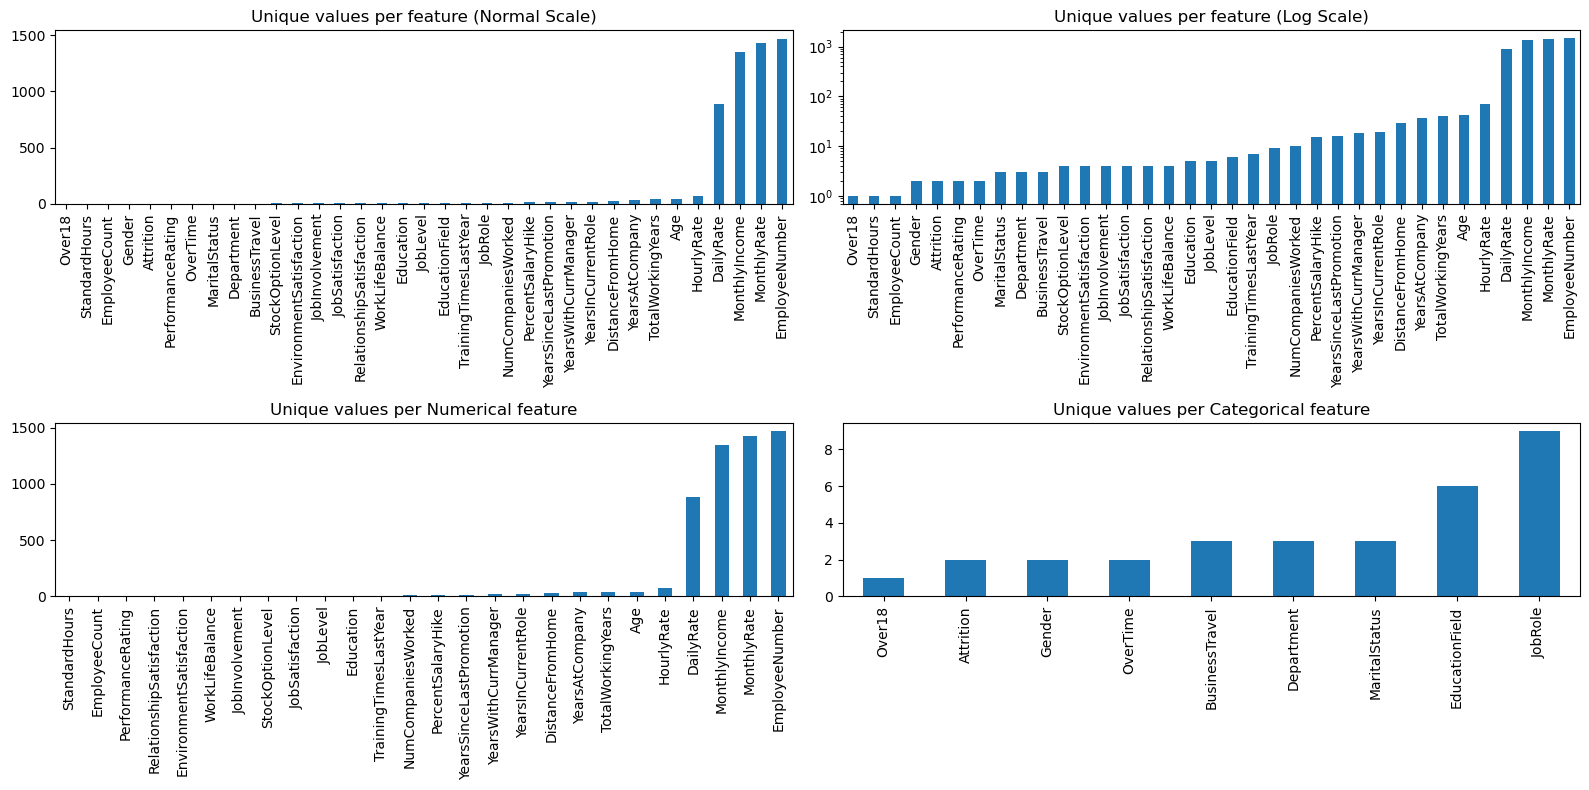

In [11]:
plt.subplots(2,2,figsize=(16,8),squeeze=False)
plt.subplot(2,2,1)
df.nunique().sort_values().plot.bar(  title="Unique values per feature (Normal Scale)")
plt.subplot(2,2,2)
df.nunique().sort_values().plot.bar( logy=True, title="Unique values per feature (Log Scale)")

plt.subplot(2,2,3)
df.select_dtypes(include="number").nunique().sort_values().plot.bar(title="Unique values per Numerical feature");
plt.subplot(2,2,4)
df.select_dtypes(exclude="number").nunique().sort_values().plot.bar(title="Unique values per Categorical feature");
plt.tight_layout()
plt.show()

### Quality Investigation

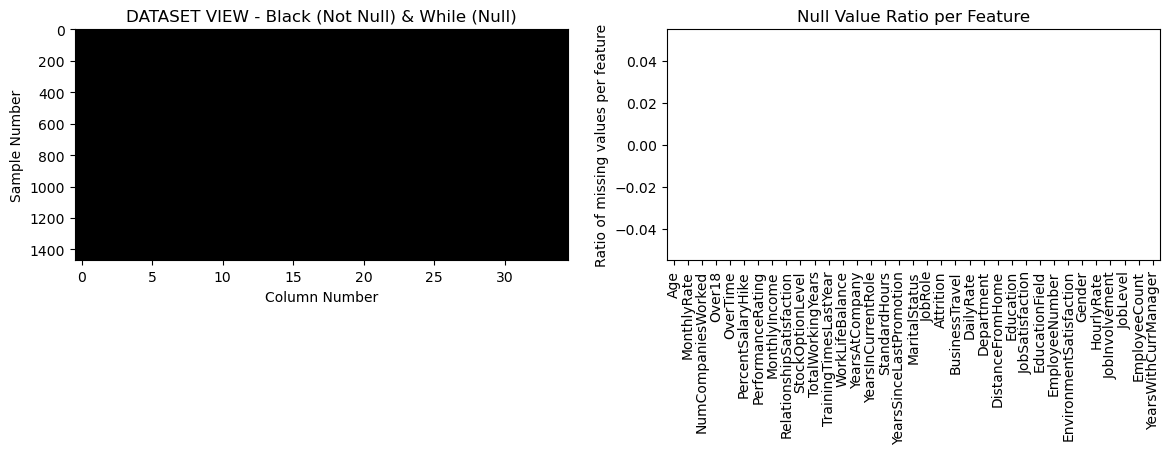

In [12]:
plt.subplots(1,2,figsize=(14,3))
plt.subplot(1,2,1)
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray") # we can test any condition in df using this graph
plt.xlabel("Column Number")
plt.ylabel("Sample Number")
plt.title("DATASET VIEW - Black (Not Null) & While (Null)")
plt.subplot(1,2,2)
df.isna().mean().sort_values().plot( kind="bar", title="Null Value Ratio per Feature", ylabel="Ratio of missing values per feature")
plt.show()

In [13]:
# No Null Values Observed 

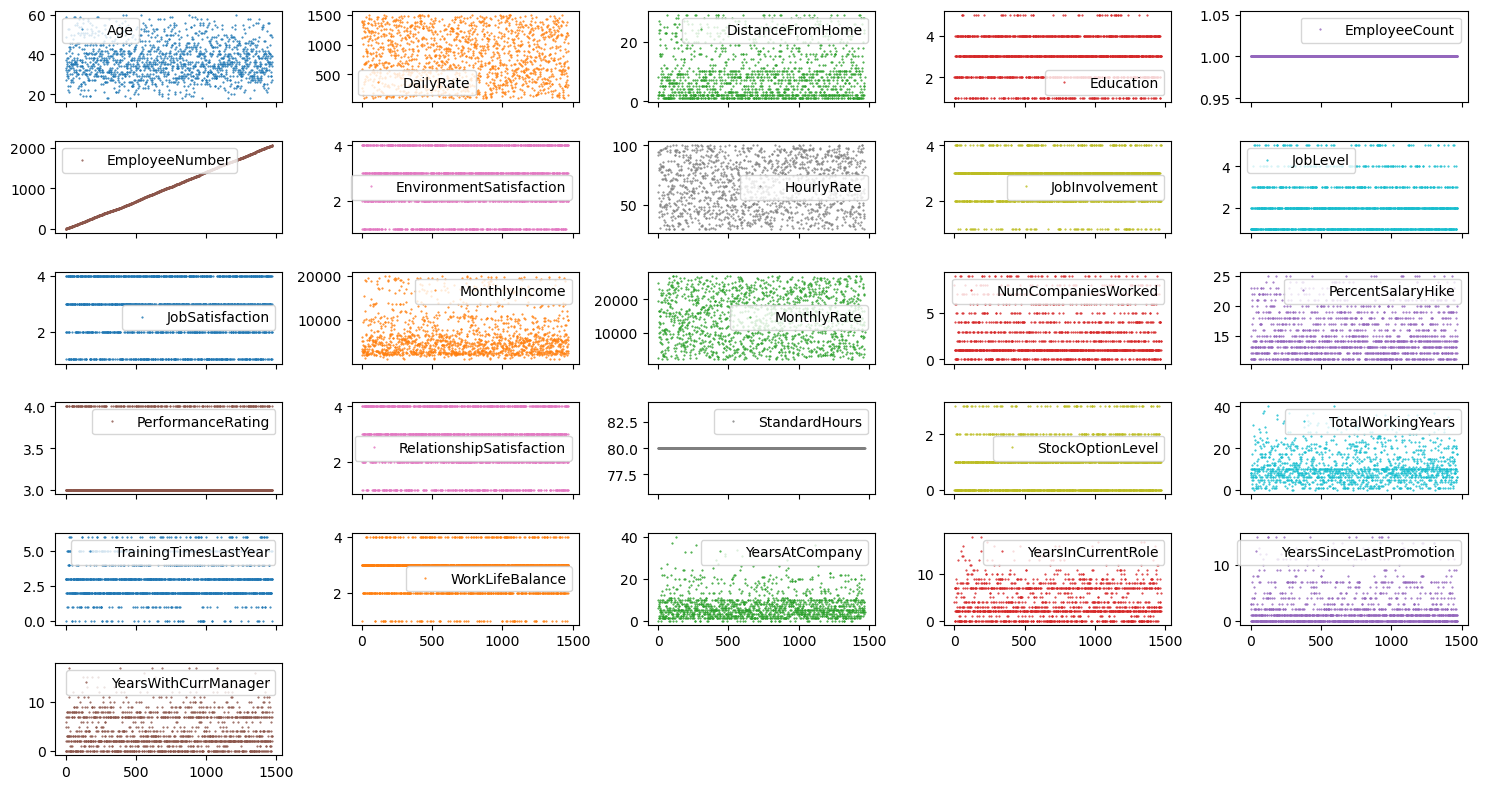

In [14]:
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 5),
          figsize=(15,8), markersize=1)
plt.tight_layout()

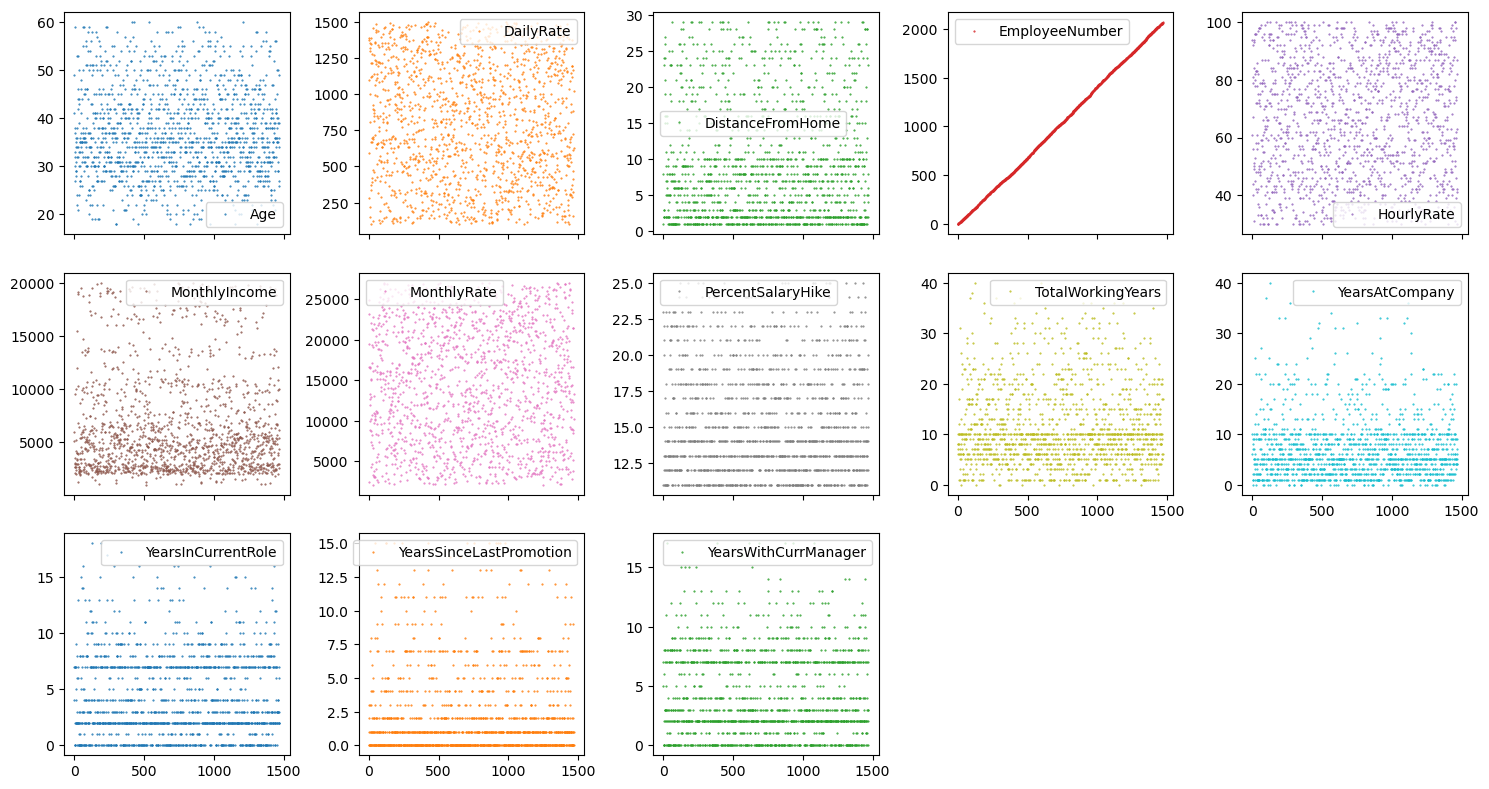

In [15]:
# Complete Rows
# For all Numerical columnn for all rows 
cat_threshold=10
fields_num=df.nunique()[df.nunique() >cat_threshold].index.tolist()

df[fields_num].plot(lw=0, marker=".", subplots=True, layout=(-1, 5),
          figsize=(15,8), markersize=1)
plt.tight_layout()

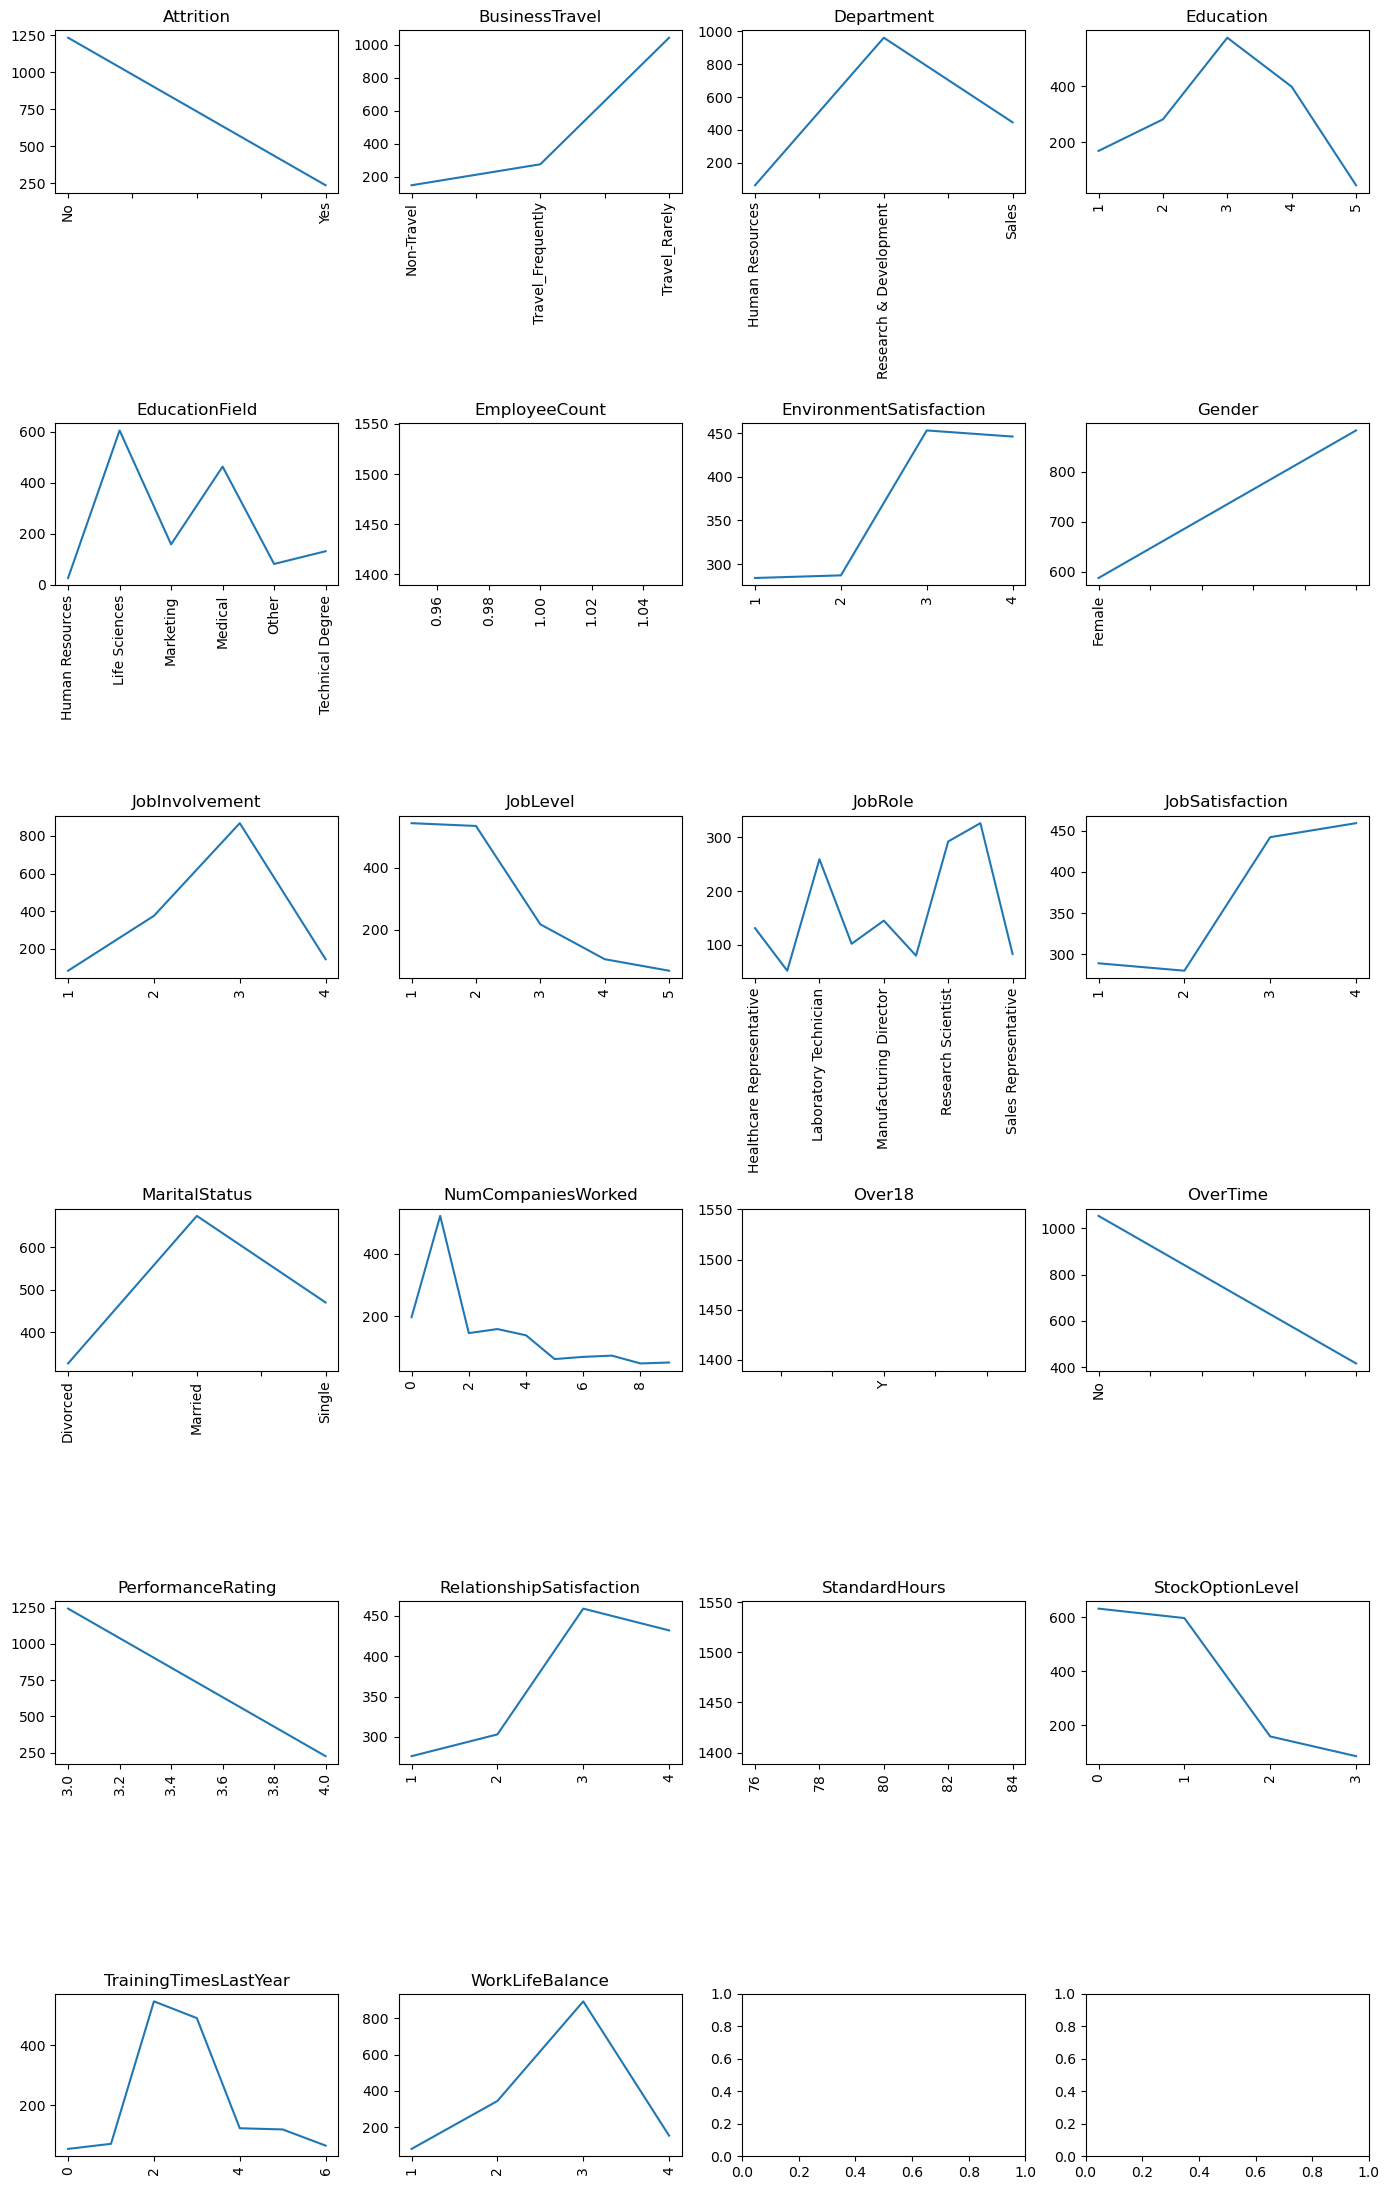

In [16]:

#method 1
# Manually pass column
# fields=['Gender','Exp Type']

#method 2
#For categorical column having distinct categories count <=cat_threshold
cat_threshold=10
fields=df.nunique()[df.nunique() <=cat_threshold].index.tolist()

figuresize=(14,22)
cols=4
rows=math.ceil(len(fields)/cols)
#print()

plt.subplots(rows,cols,figsize=figuresize)
for i in range(1,len(fields)+1) :
    plt.subplot(rows,cols,i)
    df[fields[i-1]].value_counts().sort_index().plot() 
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.title(fields[i-1])
plt.show()

In [17]:
# Columns With no relation
    # EmployeeNumber 
    # EmployeeCount
    # StandardHour
    # Over18
print(df.shape)    
df.drop(columns=['EmployeeNumber','EmployeeCount','StandardHours','Over18'],inplace=True)    
print(df.shape) 

(1470, 35)
(1470, 31)


In [44]:
x

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'NumCompaniesWorked',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

### Content Investigation

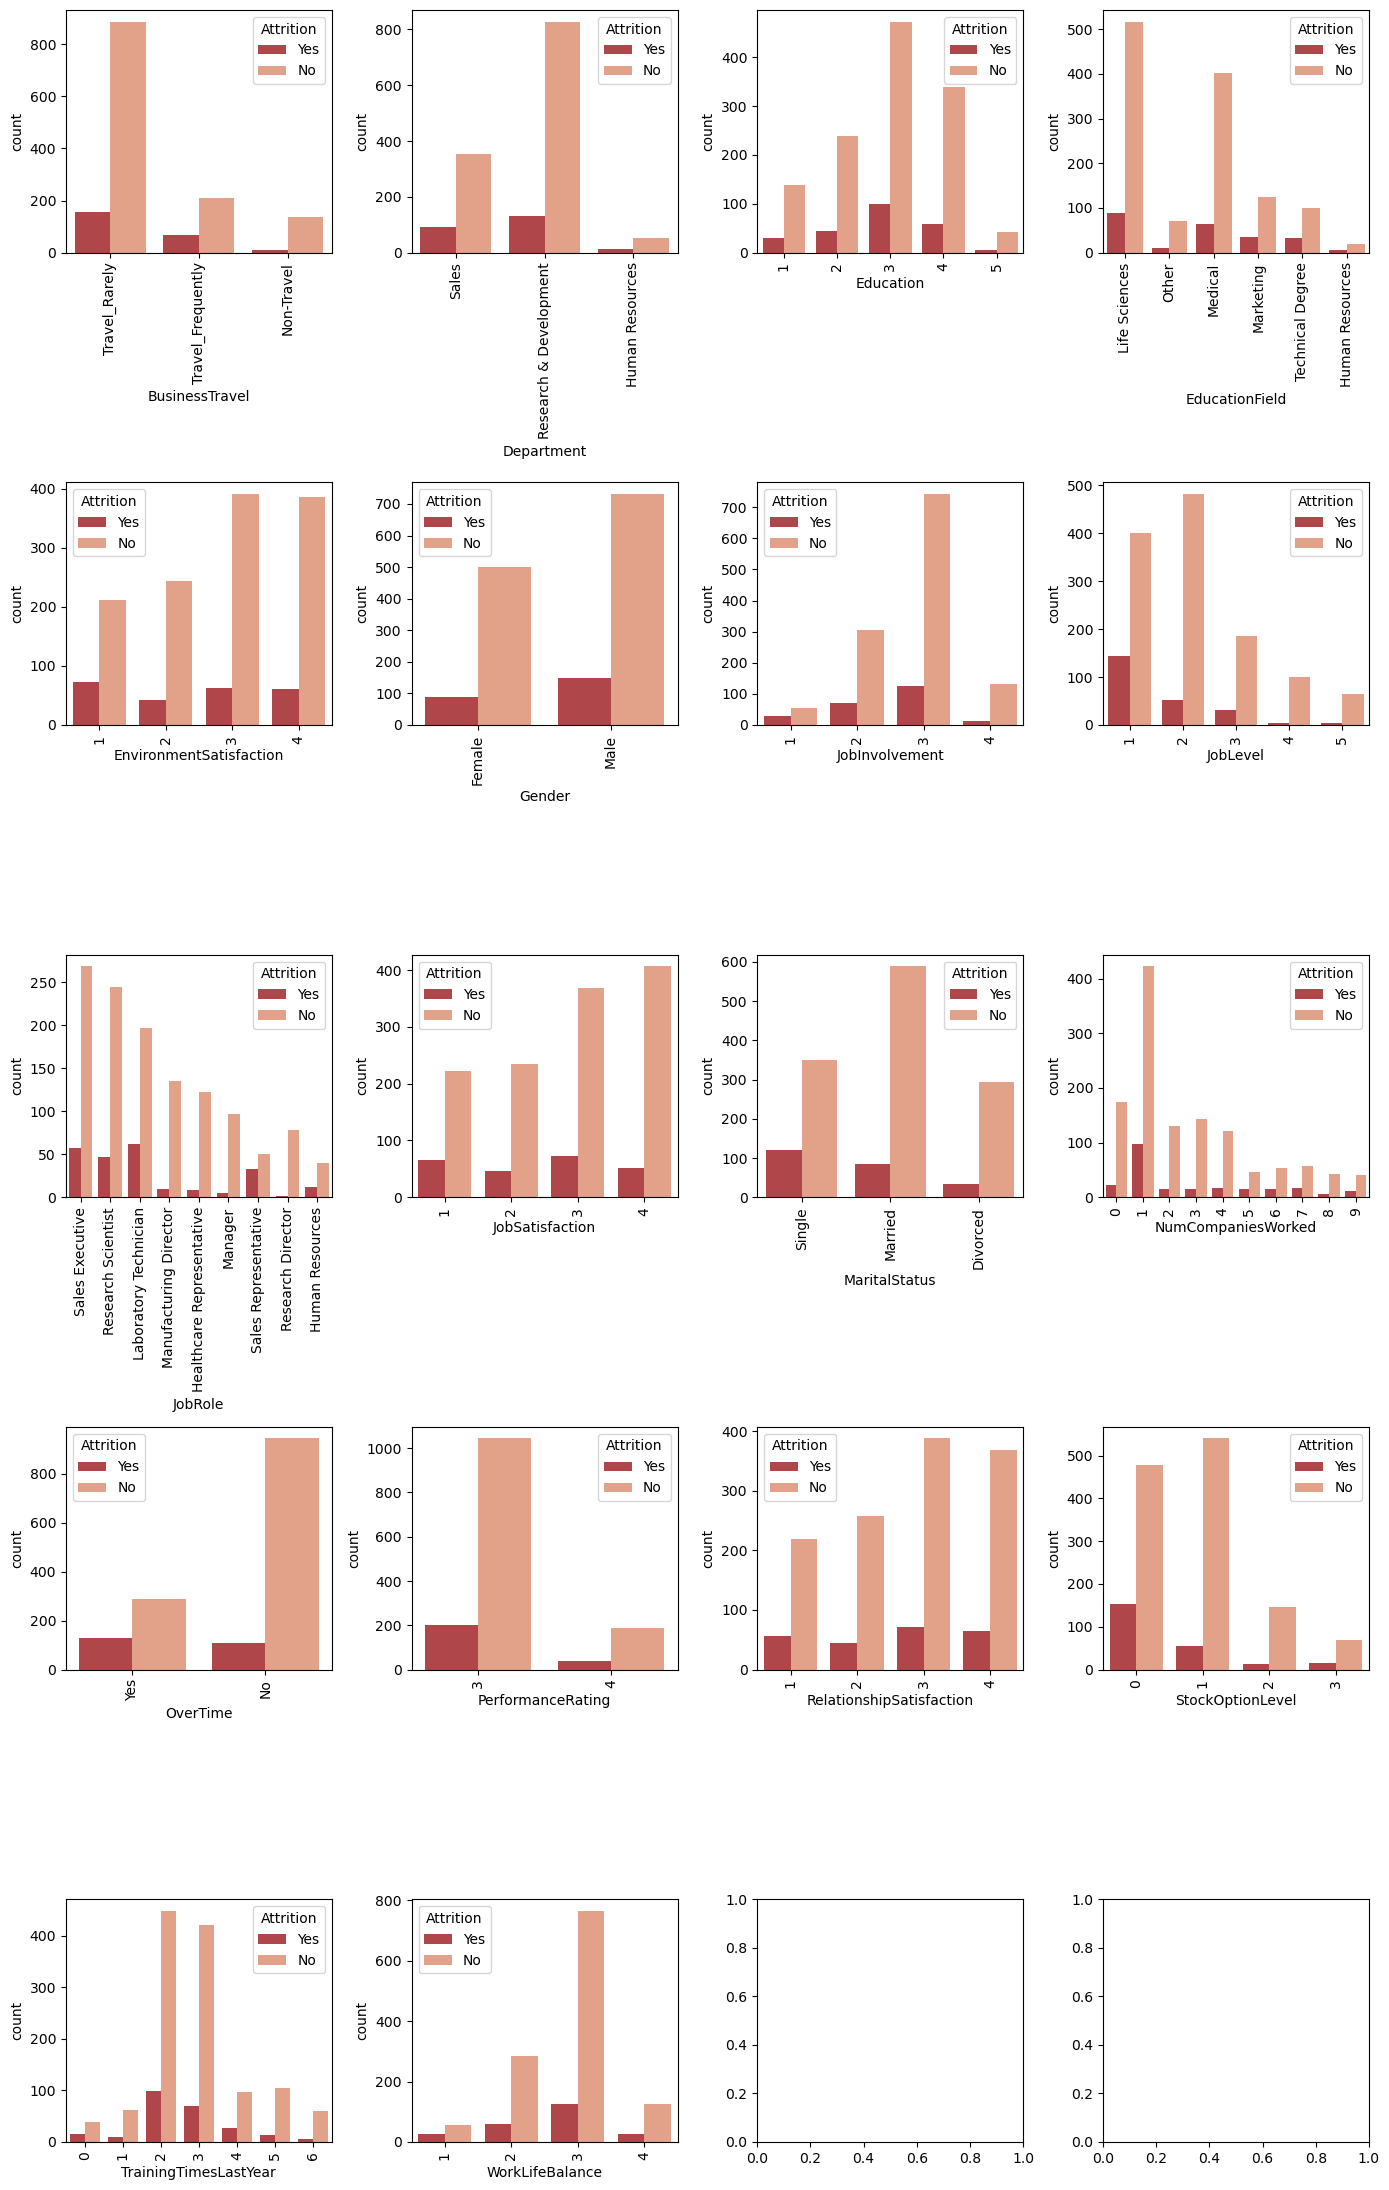

In [19]:
cat_threshold=10

x=df.nunique()[df.nunique() <=cat_threshold].index.tolist()

y="Attrition"

x.remove(y)
figuresize=(14,22)
cols=4
rows=math.ceil(len(x)/cols)
#print()

plt.subplots(rows,cols,figsize=figuresize )
for i in range(1,len(x)+1) :
    plt.subplot(rows,cols,i)
    sns.countplot(x=df[x[i-1]],hue=df[y],palette=sns.color_palette("RdBu"))
    plt.xticks(rotation=90)
    plt.tight_layout()
    #plt.title(x[i-1])
plt.show()


#plt.figure(figsize=(12,3))

#    sns.countplot(x=df["EducationField"],hue=df["Attrition"],palette=sns.color_palette("RdBu"))
#    plt.title("Distribution of Attrition in employees over over EducationField")
#plt.show()

In [26]:
for i in x:
    Coloumn_To_Aggregate=[i]
    Coloumn_To_Aggregate.append('Attrition')
    df6=pd.merge(df.groupby(Coloumn_To_Aggregate).size().reset_index(name='ind_siz'), 
    df.groupby(Coloumn_To_Aggregate[:-1]).size().reset_index(name='Total'), on =Coloumn_To_Aggregate[:-1])
    df6['Sub_Ratio']=round(df6['ind_siz']/df6['Total'] ,2)
    Coloumn_To_Aggregate.append('Sub_Ratio')
    if len(df6.loc[(df6.Attrition=='Yes') & (df6.Sub_Ratio >= 0.30)]) :
        print(i)
    

JobInvolvement
JobRole
OverTime
WorkLifeBalance


### JobInvolvement

In [33]:
Coloumn_To_Aggregate=['JobInvolvement','Attrition']
df6=pd.merge(df.groupby(Coloumn_To_Aggregate).size().reset_index(name='ind_siz'), 
             df.groupby(Coloumn_To_Aggregate[:-1]).size().reset_index(name='Total'), on =Coloumn_To_Aggregate[:-1])
df6['Sub_Ratio']=round(df6['ind_siz']/df6['Total'] ,2)
Coloumn_To_Aggregate.append('Sub_Ratio')
df6.loc[(df6.Attrition=='Yes') & (df6.Sub_Ratio >= 0.30)]

,JobInvolvement,Attrition,ind_siz,Total,Sub_Ratio
1,1,Yes,28,83,0.34


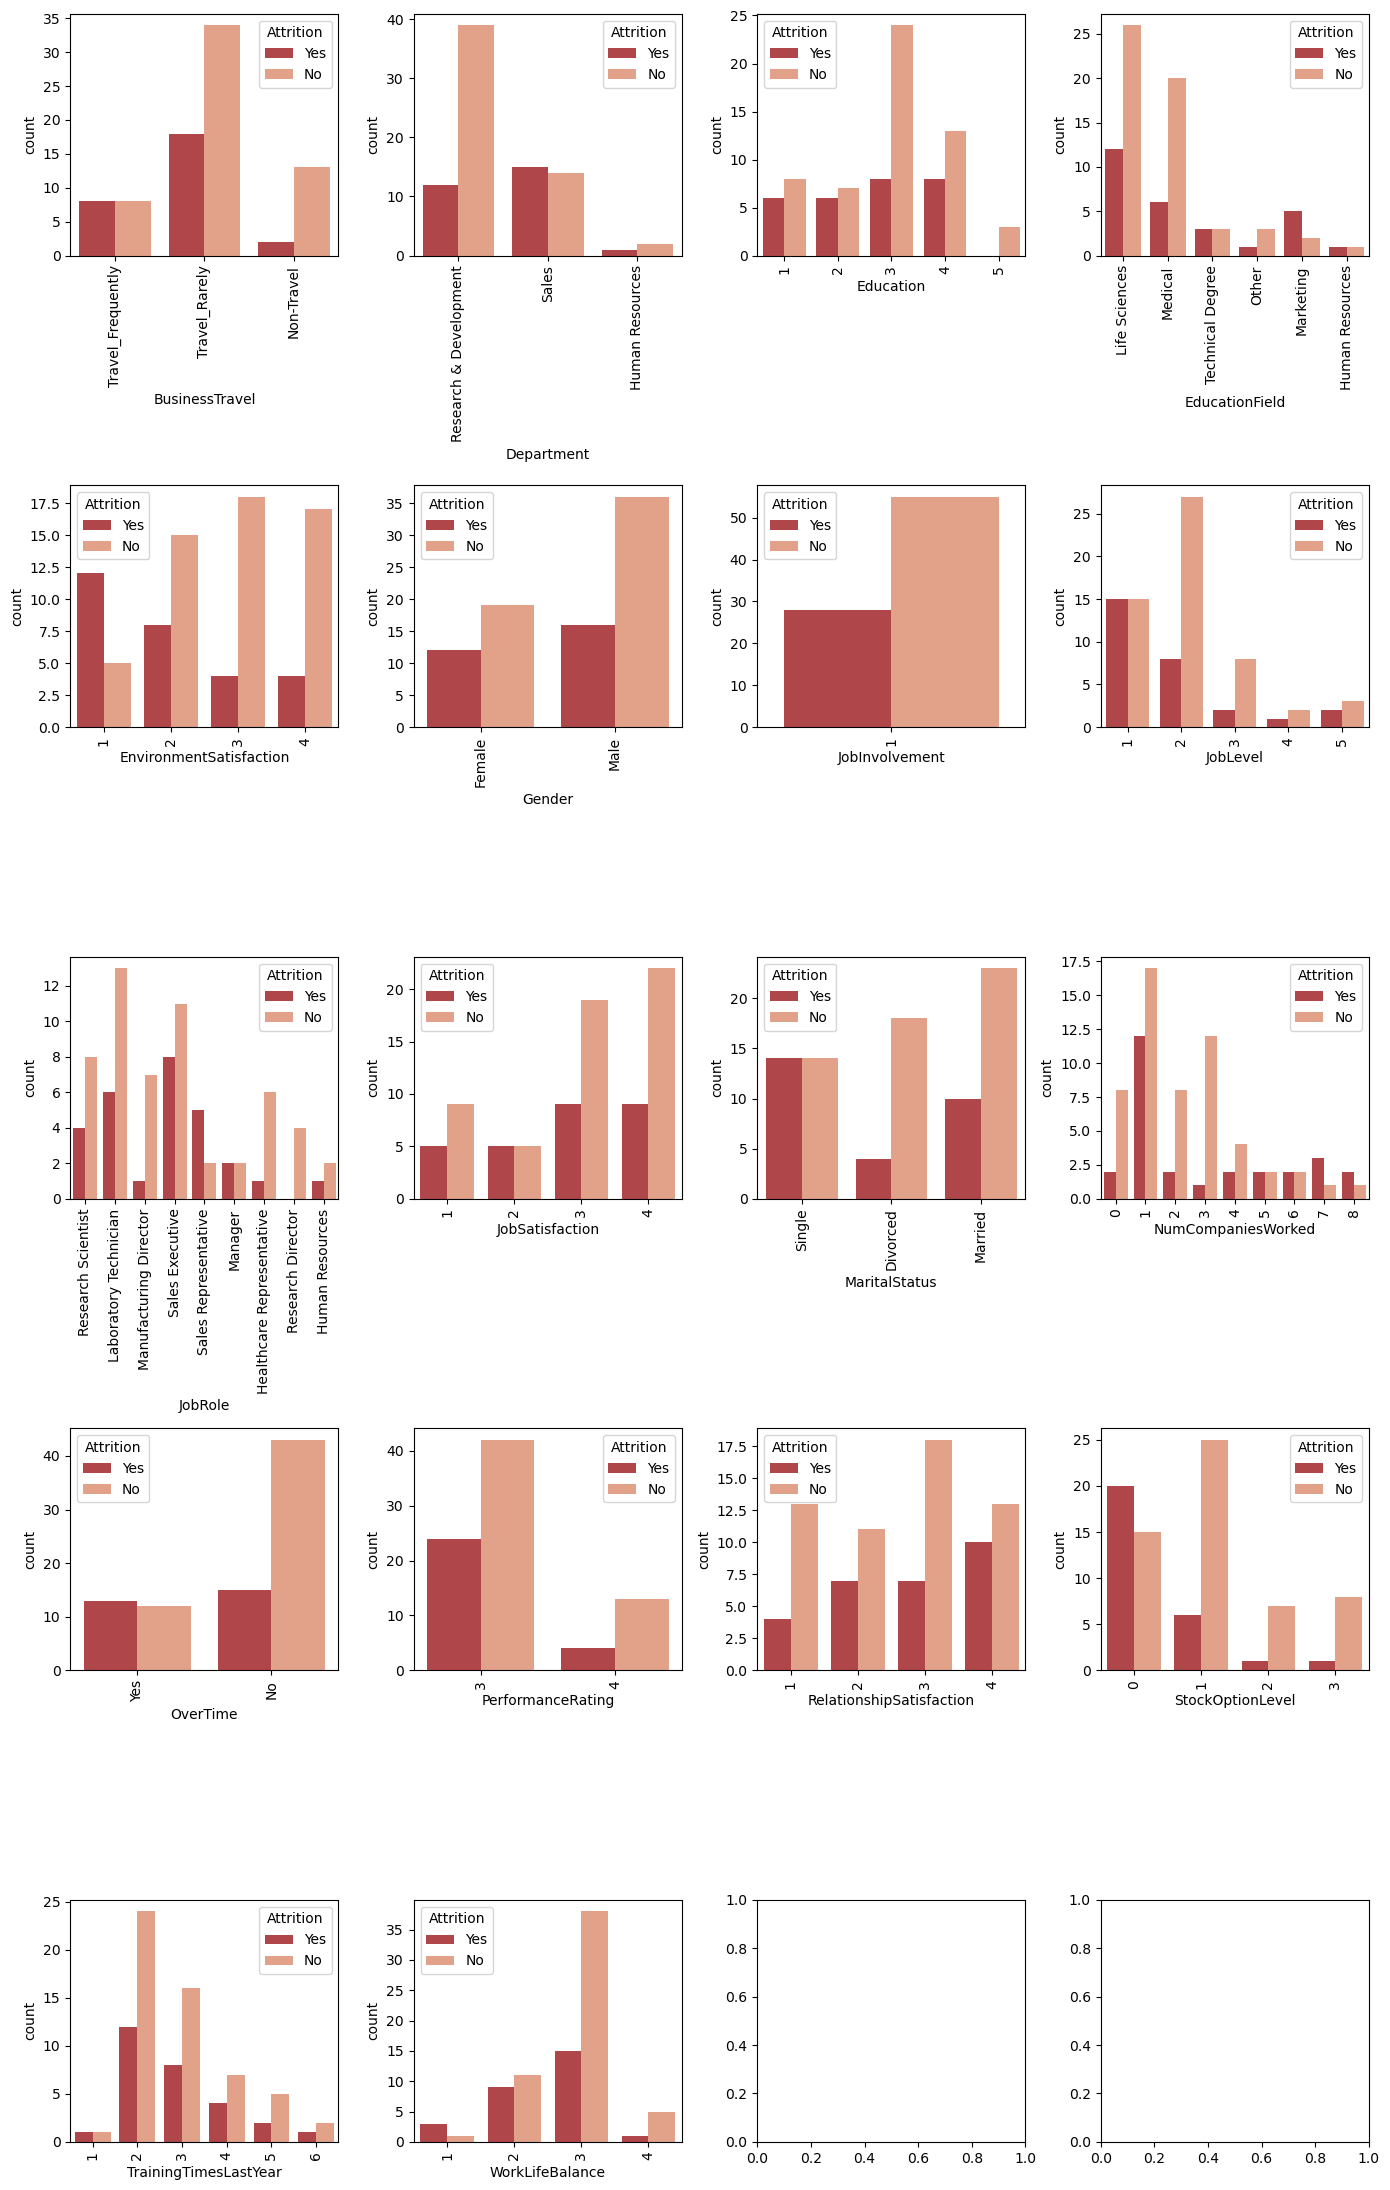

In [35]:
cat_threshold=10

x=df.nunique()[df.nunique() <=cat_threshold].index.tolist()

y="Attrition"
temp_df=df[df.JobInvolvement==1]
x.remove(y)
figuresize=(14,22)
cols=4
rows=math.ceil(len(x)/cols)
#print()

plt.subplots(rows,cols,figsize=figuresize )
for i in range(1,len(x)+1) :
    plt.subplot(rows,cols,i)
    sns.countplot(x=temp_df[x[i-1]],hue=df[y],palette=sns.color_palette("RdBu"))
    plt.xticks(rotation=90)
    plt.tight_layout()
    #plt.title(x[i-1])
plt.show()


In [56]:
for i in x:
    if i=='JobInvolvement' :
        continue
        
    Coloumn_To_Aggregate=[i]
    
    Coloumn_To_Aggregate.extend(['JobInvolvement','Attrition'])
    df6=pd.merge(df.groupby(Coloumn_To_Aggregate).size().reset_index(name='ind_siz'), 
    df.groupby(Coloumn_To_Aggregate[:-1]).size().reset_index(name='Total'), on =Coloumn_To_Aggregate[:-1])
    df6['Sub_Ratio']=round(df6['ind_siz']/df6['Total'] ,2)
    Coloumn_To_Aggregate.append('Sub_Ratio')
    if len(df6.loc[(df6.Attrition=='Yes') & (df6.Sub_Ratio >= 0.70)]) :
        print(i)
    

EducationField
EnvironmentSatisfaction
JobRole
NumCompaniesWorked
WorkLifeBalance


In [58]:
Coloumn_To_Aggregate=['JobInvolvement','EducationField','Attrition']
df6=pd.merge(df.groupby(Coloumn_To_Aggregate).size().reset_index(name='ind_siz'), 
             df.groupby(Coloumn_To_Aggregate[:-1]).size().reset_index(name='Total'), on =Coloumn_To_Aggregate[:-1])
df6['Sub_Ratio']=round(df6['ind_siz']/df6['Total'] ,2)
Coloumn_To_Aggregate.append('Sub_Ratio')
df6.loc[(df6.Attrition=='Yes') & (df6.Sub_Ratio >= 0.50)]

,JobInvolvement,EducationField,Attrition,ind_siz,Total,Sub_Ratio
1,1,Human Resources,Yes,1,2,0.50
5,1,Marketing,Yes,5,7,0.71
11,1,Technical Degree,Yes,3,6,0.50


In [57]:
Coloumn_To_Aggregate=['JobInvolvement','EnvironmentSatisfaction','Attrition']
df6=pd.merge(df.groupby(Coloumn_To_Aggregate).size().reset_index(name='ind_siz'), 
             df.groupby(Coloumn_To_Aggregate[:-1]).size().reset_index(name='Total'), on =Coloumn_To_Aggregate[:-1])
df6['Sub_Ratio']=round(df6['ind_siz']/df6['Total'] ,2)
Coloumn_To_Aggregate.append('Sub_Ratio')
df6.loc[(df6.Attrition=='Yes') & (df6.Sub_Ratio >= 0.50)]

,JobInvolvement,EnvironmentSatisfaction,Attrition,ind_siz,Total,Sub_Ratio
1,1,1,Yes,12,17,0.71


In [59]:
Coloumn_To_Aggregate=['JobInvolvement','JobRole','Attrition']
df6=pd.merge(df.groupby(Coloumn_To_Aggregate).size().reset_index(name='ind_siz'), 
             df.groupby(Coloumn_To_Aggregate[:-1]).size().reset_index(name='Total'), on =Coloumn_To_Aggregate[:-1])
df6['Sub_Ratio']=round(df6['ind_siz']/df6['Total'] ,2)
Coloumn_To_Aggregate.append('Sub_Ratio')
df6.loc[(df6.Attrition=='Yes') & (df6.Sub_Ratio >= 0.50)]

,JobInvolvement,JobRole,Attrition,ind_siz,Total,Sub_Ratio
7,1,Manager,Yes,2,4,0.50
16,1,Sales Representative,Yes,5,7,0.71
32,2,Sales Representative,Yes,10,20,0.50


In [60]:
Coloumn_To_Aggregate=['JobInvolvement','NumCompaniesWorked','Attrition']
df6=pd.merge(df.groupby(Coloumn_To_Aggregate).size().reset_index(name='ind_siz'), 
             df.groupby(Coloumn_To_Aggregate[:-1]).size().reset_index(name='Total'), on =Coloumn_To_Aggregate[:-1])
df6['Sub_Ratio']=round(df6['ind_siz']/df6['Total'] ,2)
Coloumn_To_Aggregate.append('Sub_Ratio')
df6.loc[(df6.Attrition=='Yes') & (df6.Sub_Ratio >= 0.50)]

,JobInvolvement,NumCompaniesWorked,Attrition,ind_siz,Total,Sub_Ratio
11,1,5,Yes,2,4,0.50
13,1,6,Yes,2,4,0.50
15,1,7,Yes,3,4,0.75
17,1,8,Yes,2,3,0.67


In [61]:
Coloumn_To_Aggregate=['JobInvolvement','WorkLifeBalance','Attrition']
df6=pd.merge(df.groupby(Coloumn_To_Aggregate).size().reset_index(name='ind_siz'), 
             df.groupby(Coloumn_To_Aggregate[:-1]).size().reset_index(name='Total'), on =Coloumn_To_Aggregate[:-1])
df6['Sub_Ratio']=round(df6['ind_siz']/df6['Total'] ,2)
Coloumn_To_Aggregate.append('Sub_Ratio')
df6.loc[(df6.Attrition=='Yes') & (df6.Sub_Ratio >= 0.50)]

,JobInvolvement,WorkLifeBalance,Attrition,ind_siz,Total,Sub_Ratio
1,1,1,Yes,3,4,0.75


### JobRole

In [62]:
Coloumn_To_Aggregate=['JobRole','Attrition']
df6=pd.merge(df.groupby(Coloumn_To_Aggregate).size().reset_index(name='ind_siz'), 
             df.groupby(Coloumn_To_Aggregate[:-1]).size().reset_index(name='Total'), on =Coloumn_To_Aggregate[:-1])
df6['Sub_Ratio']=round(df6['ind_siz']/df6['Total'] ,2)
Coloumn_To_Aggregate.append('Sub_Ratio')
df6.loc[(df6.Attrition=='Yes') & (df6.Sub_Ratio >= 0.30)]

,JobRole,Attrition,ind_siz,Total,Sub_Ratio
17,Sales Representative,Yes,33,83,0.4


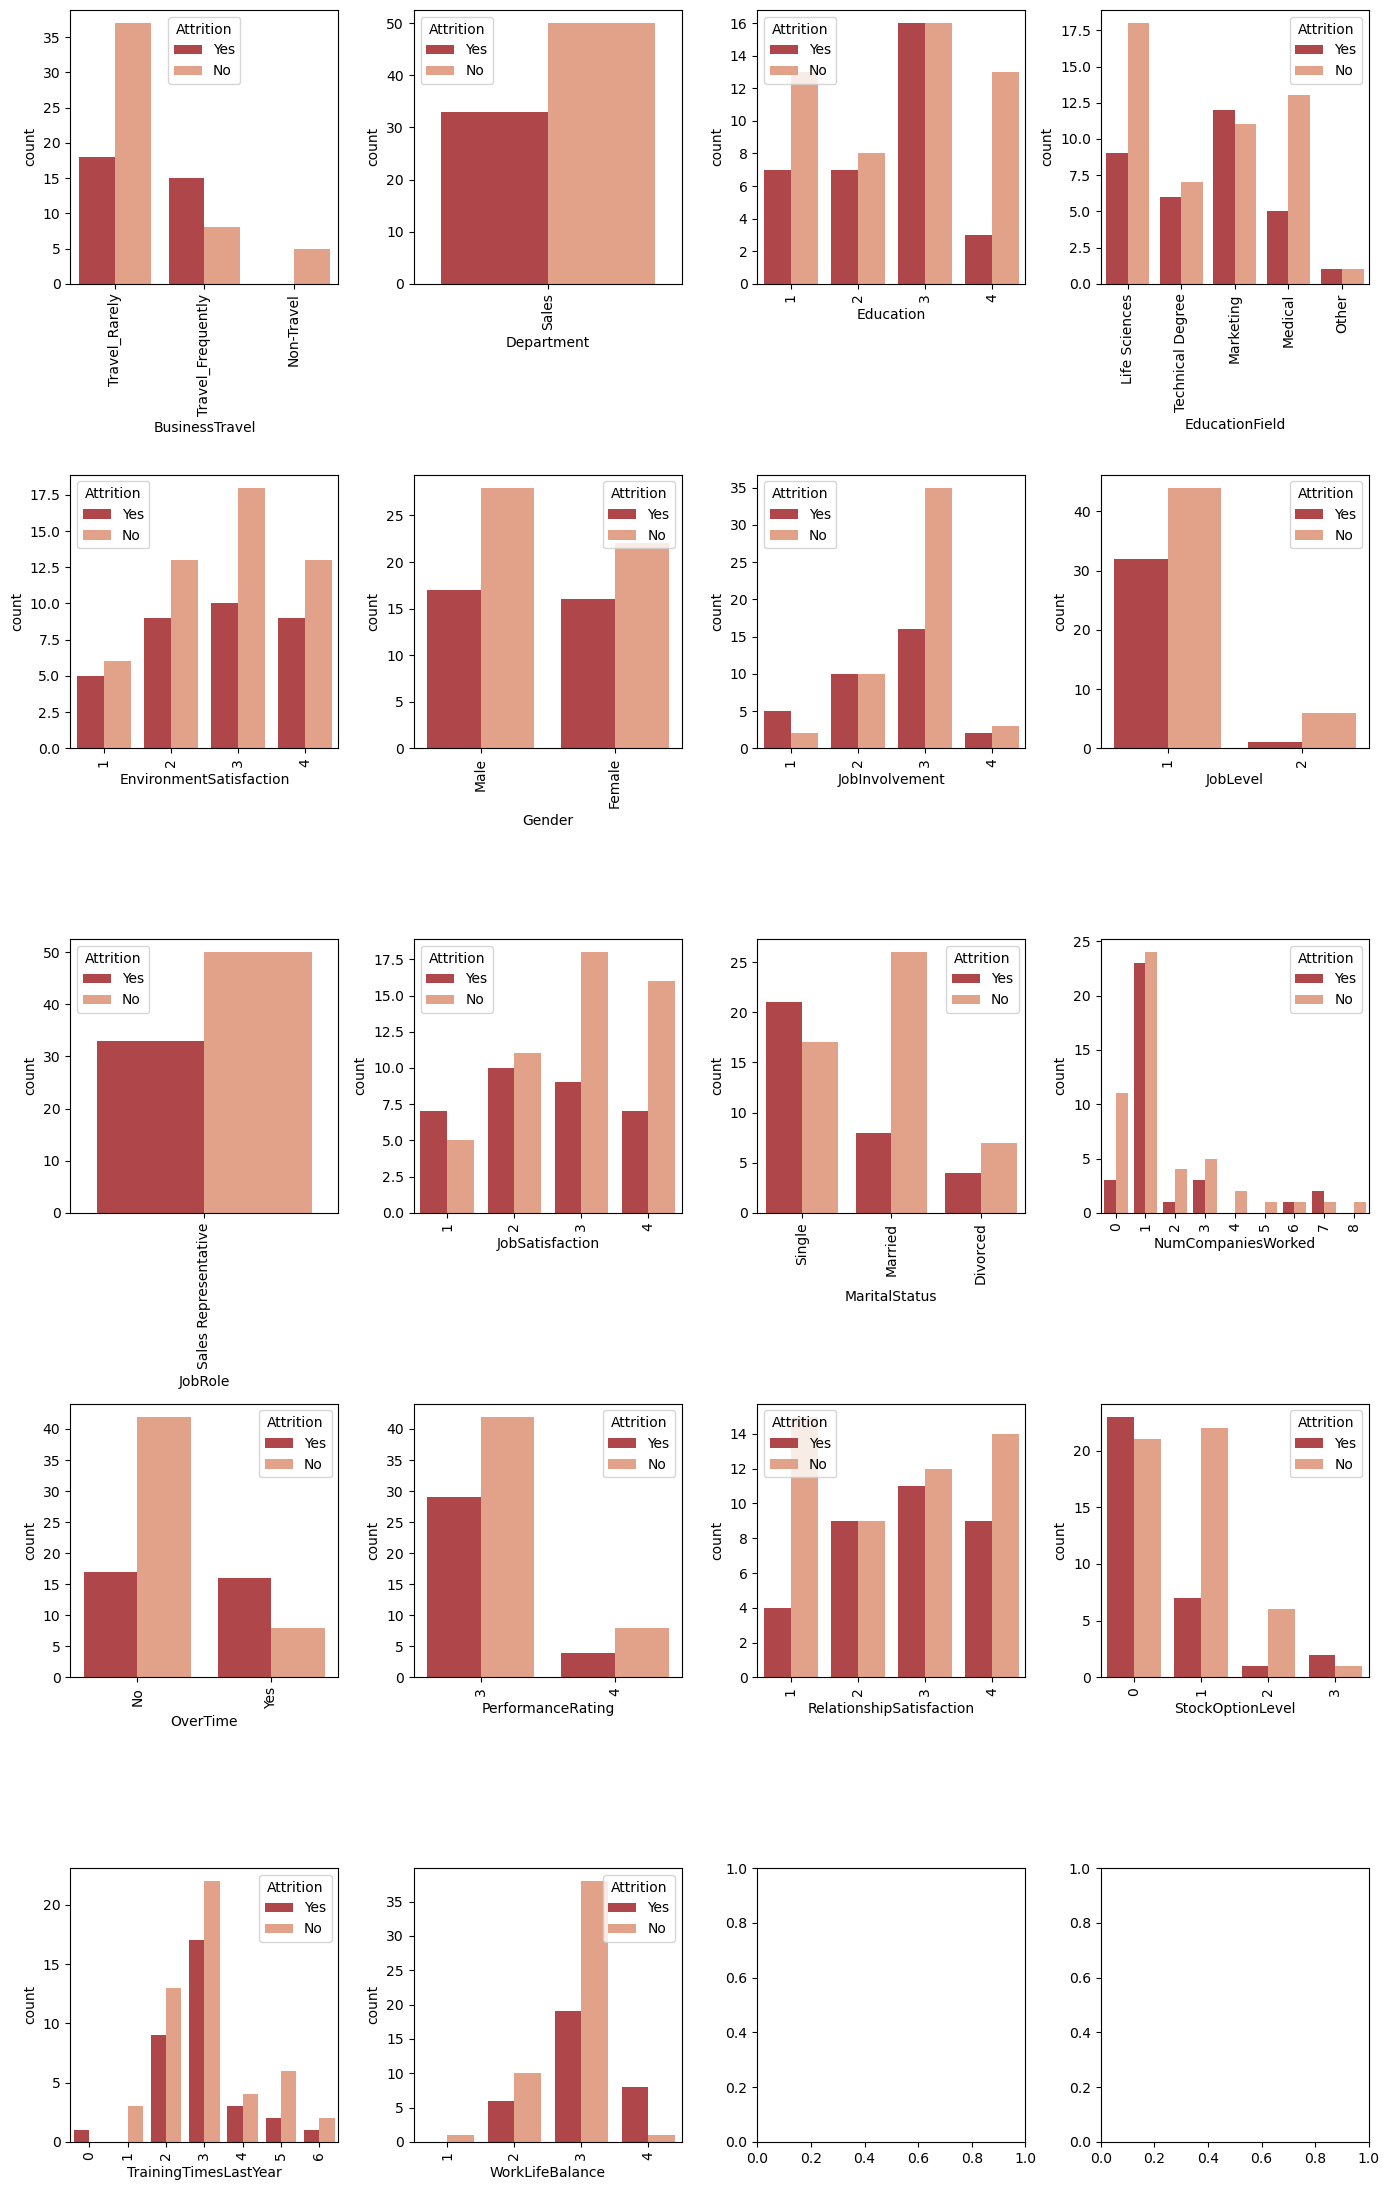

In [63]:
cat_threshold=10

x=df.nunique()[df.nunique() <=cat_threshold].index.tolist()

y="Attrition"
temp_df=df[df.JobRole=='Sales Representative']
x.remove(y)
figuresize=(14,22)
cols=4
rows=math.ceil(len(x)/cols)
#print()

plt.subplots(rows,cols,figsize=figuresize )
for i in range(1,len(x)+1) :
    plt.subplot(rows,cols,i)
    sns.countplot(x=temp_df[x[i-1]],hue=df[y],palette=sns.color_palette("RdBu"))
    plt.xticks(rotation=90)
    plt.tight_layout()
    #plt.title(x[i-1])
plt.show()


In [67]:
for i in x:
    if i=='JobRole' :
        continue
        
    Coloumn_To_Aggregate=[i]
    
    Coloumn_To_Aggregate.extend(['JobRole','Attrition'])
    df6=pd.merge(df.groupby(Coloumn_To_Aggregate).size().reset_index(name='ind_siz'), 
    df.groupby(Coloumn_To_Aggregate[:-1]).size().reset_index(name='Total'), on =Coloumn_To_Aggregate[:-1])
    df6['Sub_Ratio']=round(df6['ind_siz']/df6['Total'] ,2)
    Coloumn_To_Aggregate.append('Sub_Ratio')
    if len(df6.loc[(df6.Attrition=='Yes') & (df6.Sub_Ratio >= 0.70)]) :
        print(i)
    

JobInvolvement
TrainingTimesLastYear
WorkLifeBalance


In [69]:
Coloumn_To_Aggregate=["JobRole","WorkLifeBalance","Attrition"]
df6=pd.merge(df.groupby(Coloumn_To_Aggregate).size().reset_index(name='ind_siz'), 
             df.groupby(Coloumn_To_Aggregate[:-1]).size().reset_index(name='Total'), on =Coloumn_To_Aggregate[:-1])
df6['Sub_Ratio']=round(df6['ind_siz']/df6['Total'] ,2)
Coloumn_To_Aggregate.append('Sub_Ratio')
#df6.loc[df6.JobRole=='Sales Representative',Coloumn_To_Aggregate]
df6.loc[(df6.Attrition=='Yes') & (df6.Sub_Ratio >= 0.70)]

,JobRole,WorkLifeBalance,Attrition,ind_siz,Total,Sub_Ratio
16,Laboratory Technician,1,Yes,14,20,0.70
65,Sales Representative,4,Yes,8,9,0.89


In [70]:
Coloumn_To_Aggregate=["JobRole","TrainingTimesLastYear","Attrition"]
df6=pd.merge(df.groupby(Coloumn_To_Aggregate).size().reset_index(name='ind_siz'), 
             df.groupby(Coloumn_To_Aggregate[:-1]).size().reset_index(name='Total'), on =Coloumn_To_Aggregate[:-1])
df6['Sub_Ratio']=round(df6['ind_siz']/df6['Total'] ,2)
Coloumn_To_Aggregate.append('Sub_Ratio')
#df6.loc[df6.JobRole=='Sales Representative',Coloumn_To_Aggregate]
df6.loc[(df6.Attrition=='Yes') & (df6.Sub_Ratio >= 0.70)]

,JobRole,TrainingTimesLastYear,Attrition,ind_siz,Total,Sub_Ratio
11,Human Resources,0,Yes,2,2,1.0
94,Sales Representative,0,Yes,1,1,1.0


### OverTime

In [71]:
Coloumn_To_Aggregate=['OverTime','Attrition']
df6=pd.merge(df.groupby(Coloumn_To_Aggregate).size().reset_index(name='ind_siz'), 
             df.groupby(Coloumn_To_Aggregate[:-1]).size().reset_index(name='Total'), on =Coloumn_To_Aggregate[:-1])
df6['Sub_Ratio']=round(df6['ind_siz']/df6['Total'] ,2)
Coloumn_To_Aggregate.append('Sub_Ratio')
df6.loc[(df6.Attrition=='Yes') & (df6.Sub_Ratio >= 0.30)]

,OverTime,Attrition,ind_siz,Total,Sub_Ratio
3,Yes,Yes,127,416,0.31


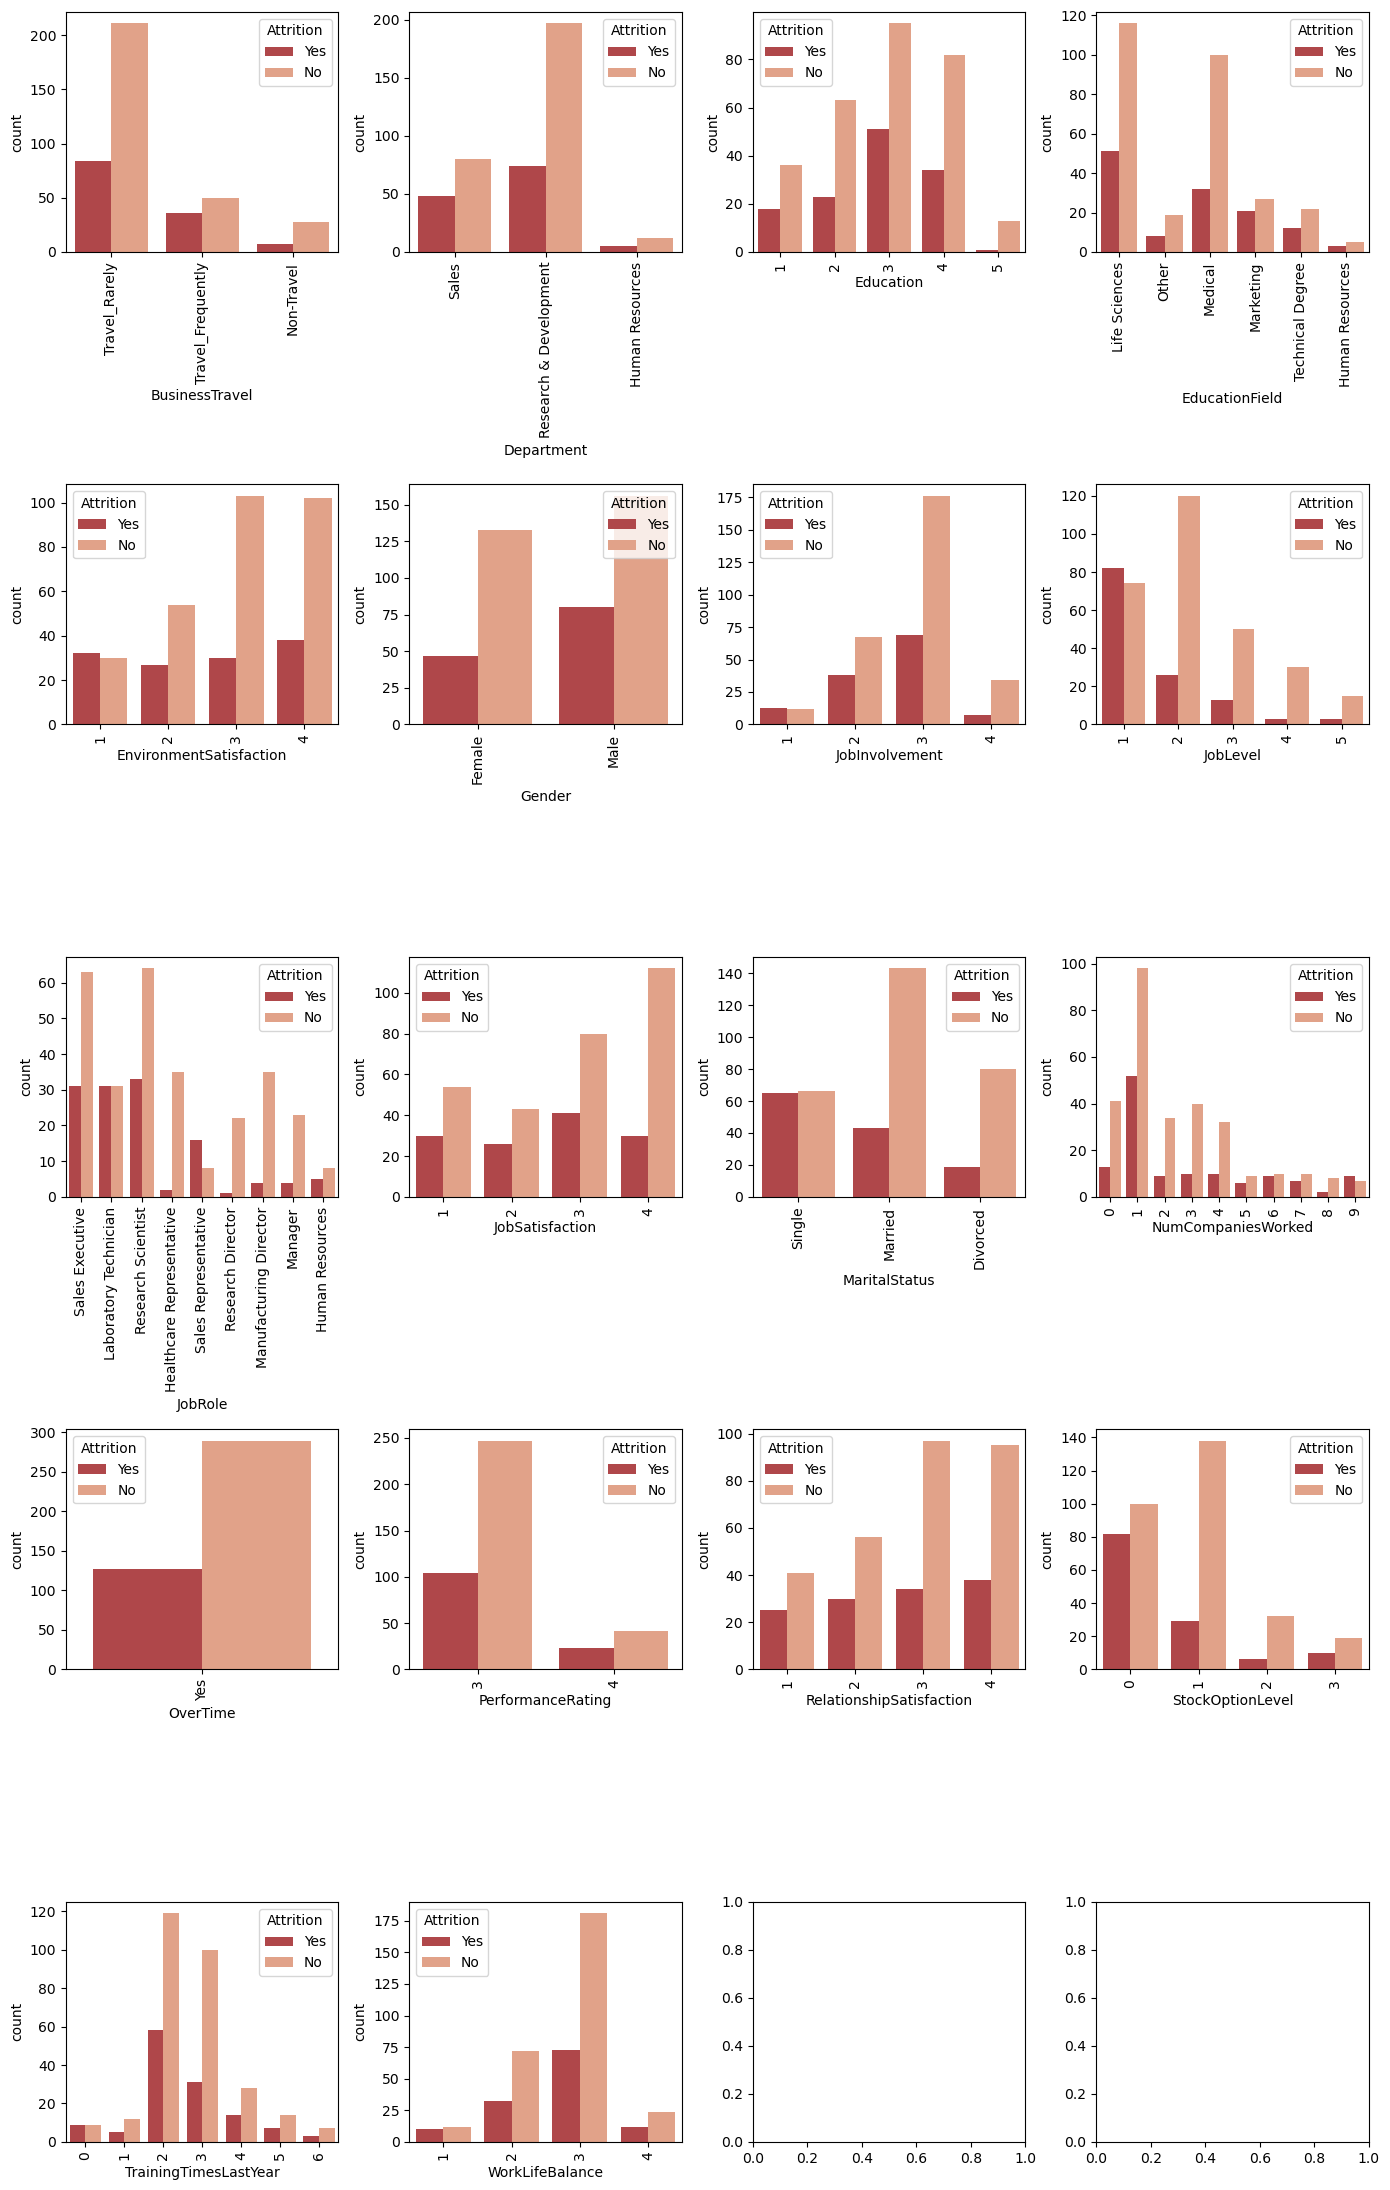

In [72]:
cat_threshold=10

x=df.nunique()[df.nunique() <=cat_threshold].index.tolist()

y="Attrition"
temp_df=df[df.OverTime=='Yes']
x.remove(y)
figuresize=(14,22)
cols=4
rows=math.ceil(len(x)/cols)
#print()

plt.subplots(rows,cols,figsize=figuresize )
for i in range(1,len(x)+1) :
    plt.subplot(rows,cols,i)
    sns.countplot(x=temp_df[x[i-1]],hue=df[y],palette=sns.color_palette("RdBu"))
    plt.xticks(rotation=90)
    plt.tight_layout()
    #plt.title(x[i-1])
plt.show()


In [74]:
for i in x:
    if i=='OverTime' :
        continue
        
    Coloumn_To_Aggregate=[i]
    
    Coloumn_To_Aggregate.extend(['OverTime','Attrition'])
    df6=pd.merge(df.groupby(Coloumn_To_Aggregate).size().reset_index(name='ind_siz'), 
    df.groupby(Coloumn_To_Aggregate[:-1]).size().reset_index(name='Total'), on =Coloumn_To_Aggregate[:-1])
    df6['Sub_Ratio']=round(df6['ind_siz']/df6['Total'] ,2)
    Coloumn_To_Aggregate.append('Sub_Ratio')
    if len(df6.loc[(df6.Attrition=='Yes') & (df6.Sub_Ratio >= 0.60)]) :
        print(i)
    

JobRole


### WorkLifeBalance

In [75]:
Coloumn_To_Aggregate=['WorkLifeBalance','Attrition']
df6=pd.merge(df.groupby(Coloumn_To_Aggregate).size().reset_index(name='ind_siz'), 
             df.groupby(Coloumn_To_Aggregate[:-1]).size().reset_index(name='Total'), on =Coloumn_To_Aggregate[:-1])
df6['Sub_Ratio']=round(df6['ind_siz']/df6['Total'] ,2)
Coloumn_To_Aggregate.append('Sub_Ratio')
df6.loc[(df6.Attrition=='Yes') & (df6.Sub_Ratio >= 0.30)]

,WorkLifeBalance,Attrition,ind_siz,Total,Sub_Ratio
1,1,Yes,25,80,0.31


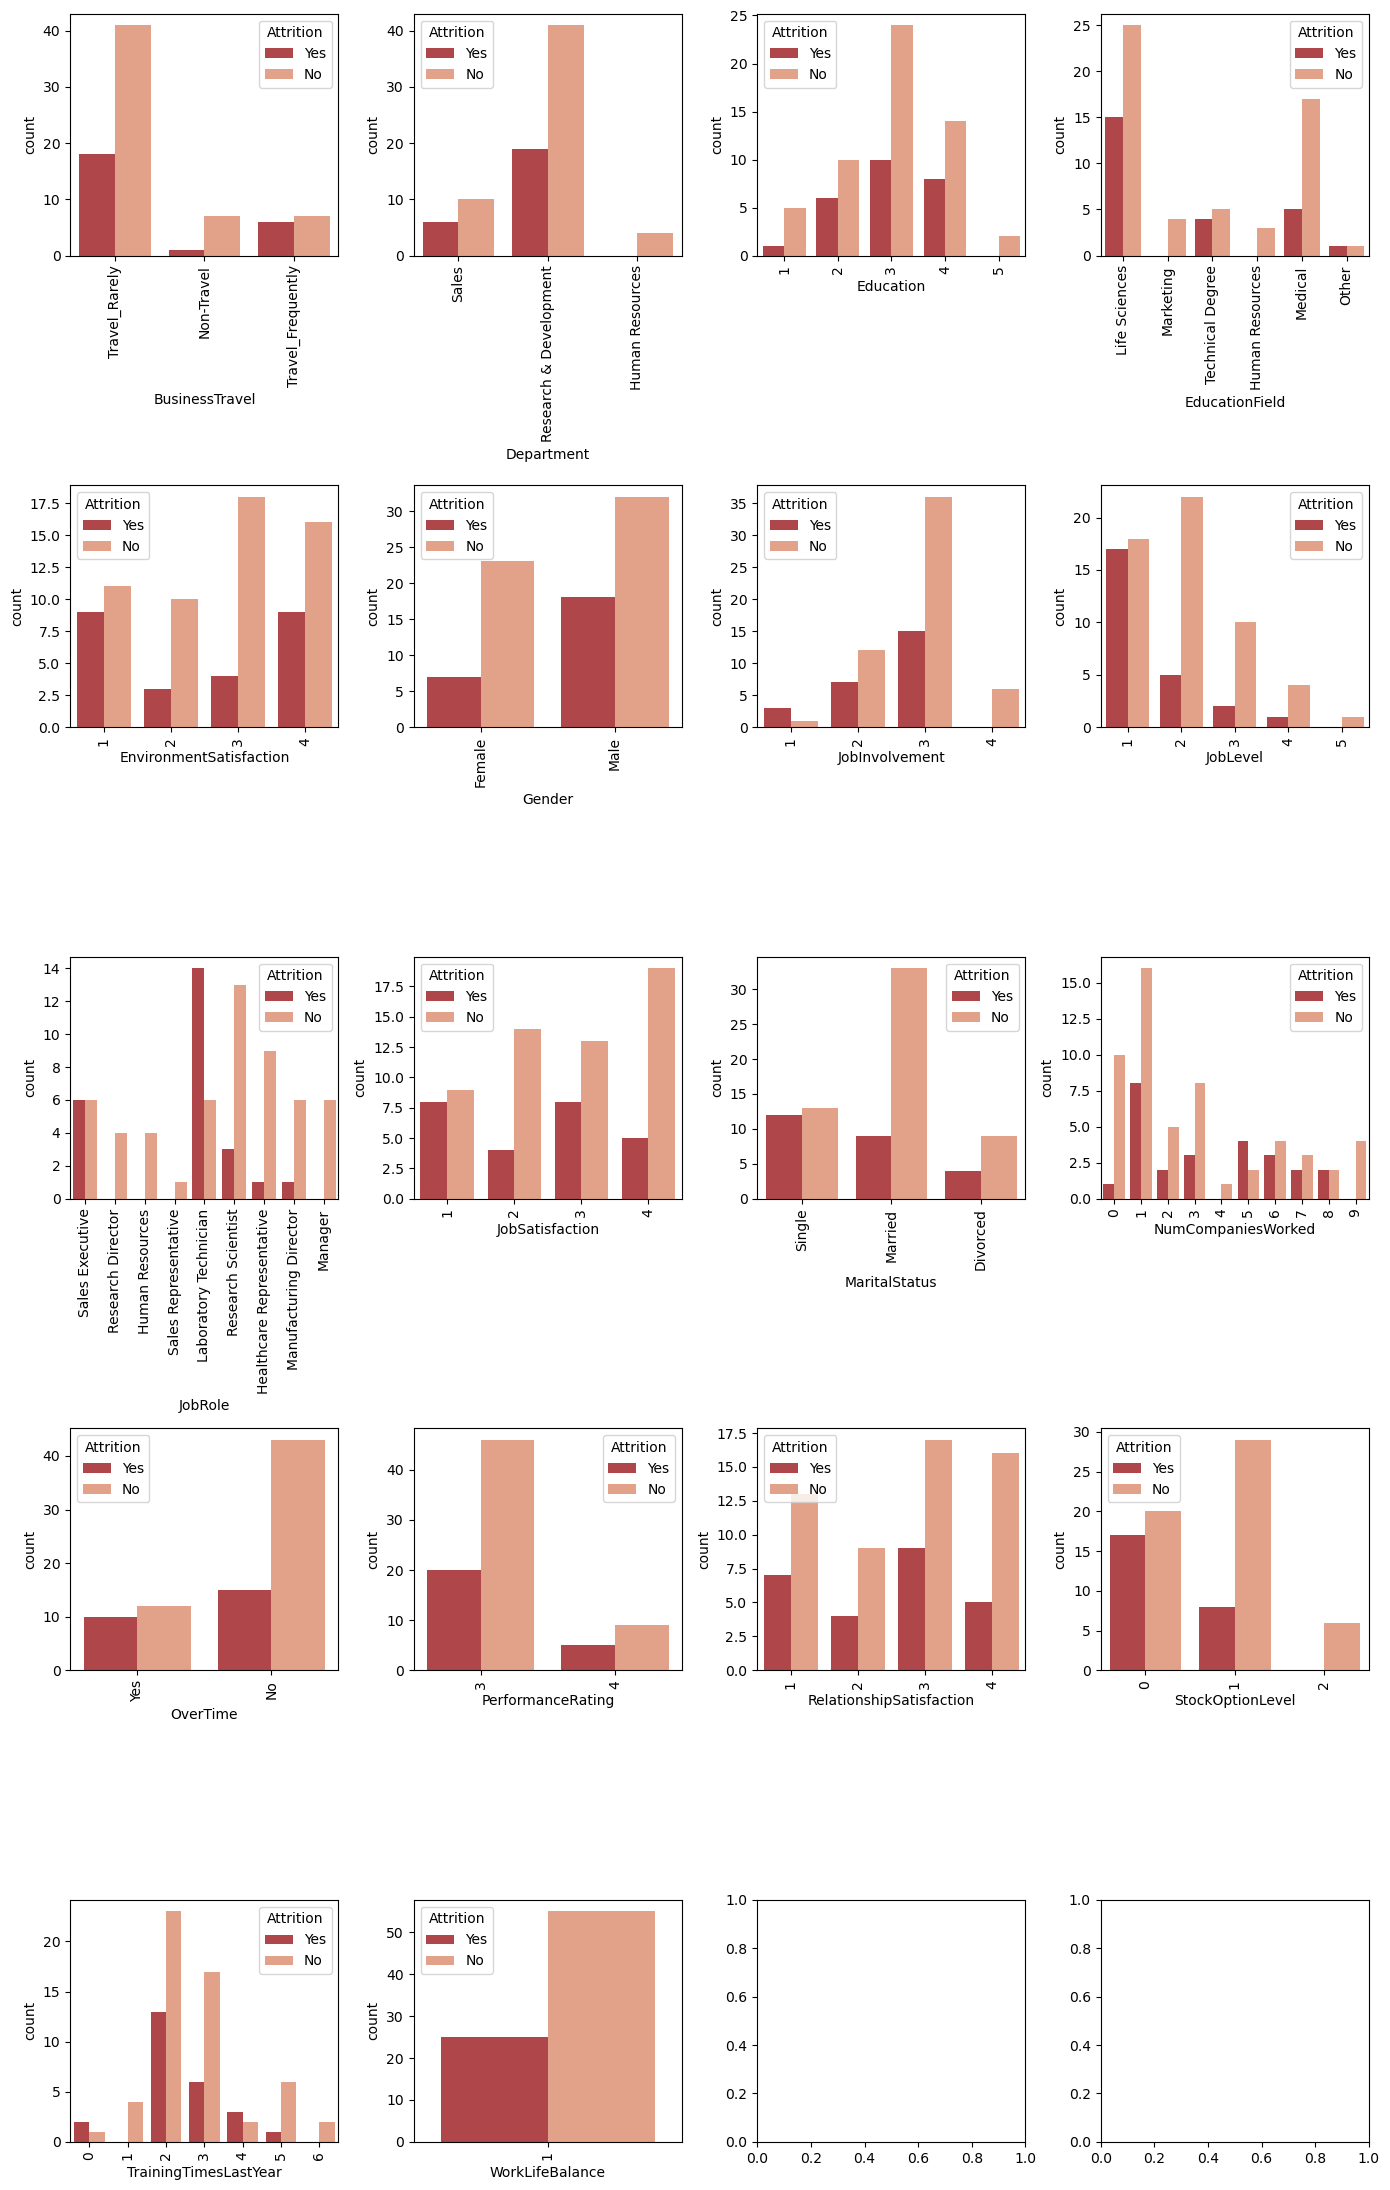

In [77]:
cat_threshold=10

x=df.nunique()[df.nunique() <=cat_threshold].index.tolist()

y="Attrition"
temp_df=df[df.WorkLifeBalance==1]
x.remove(y)
figuresize=(14,22)
cols=4
rows=math.ceil(len(x)/cols)
#print()

plt.subplots(rows,cols,figsize=figuresize )
for i in range(1,len(x)+1) :
    plt.subplot(rows,cols,i)
    sns.countplot(x=temp_df[x[i-1]],hue=df[y],palette=sns.color_palette("RdBu"))
    plt.xticks(rotation=90)
    plt.tight_layout()
    #plt.title(x[i-1])
plt.show()


In [78]:
for i in x:
    if i=='WorkLifeBalance' :
        continue
        
    Coloumn_To_Aggregate=[i]
    
    Coloumn_To_Aggregate.extend(['WorkLifeBalance','Attrition'])
    df6=pd.merge(df.groupby(Coloumn_To_Aggregate).size().reset_index(name='ind_siz'), 
    df.groupby(Coloumn_To_Aggregate[:-1]).size().reset_index(name='Total'), on =Coloumn_To_Aggregate[:-1])
    df6['Sub_Ratio']=round(df6['ind_siz']/df6['Total'] ,2)
    Coloumn_To_Aggregate.append('Sub_Ratio')
    if len(df6.loc[(df6.Attrition=='Yes') & (df6.Sub_Ratio >= 0.60)]) :
        print(i)
    

JobInvolvement
JobRole
NumCompaniesWorked
TrainingTimesLastYear


### Others

In [ ]:
df[df.JobLevel=='1']

In [ ]:
Coloumn_To_Aggregate=['JobRole','JobInvolvement','Attrition']
df6=pd.merge(df.groupby(Coloumn_To_Aggregate).size().reset_index(name='ind_siz'), 
             df.groupby(Coloumn_To_Aggregate[:-1]).size().reset_index(name='Total'), on =Coloumn_To_Aggregate[:-1])
df6['Sub_Ratio']=round(df6['ind_siz']/df6['Total'] ,2)
Coloumn_To_Aggregate.append('Sub_Ratio')
df6.loc[(df6.Attrition=='Yes') & (df6.Sub_Ratio >= 0.50)]

In [ ]:
Coloumn_To_Aggregate=['JobRole','WorkLifeBalance','Attrition']
df6=pd.merge(df.groupby(Coloumn_To_Aggregate).size().reset_index(name='ind_siz'), 
             df.groupby(Coloumn_To_Aggregate[:-1]).size().reset_index(name='Total'), on =Coloumn_To_Aggregate[:-1])
df6['Sub_Ratio']=round(df6['ind_siz']/df6['Total'] ,2)
Coloumn_To_Aggregate.append('Sub_Ratio')
df6.loc[(df6.Attrition=='Yes') & (df6.Sub_Ratio >= 0.50)]

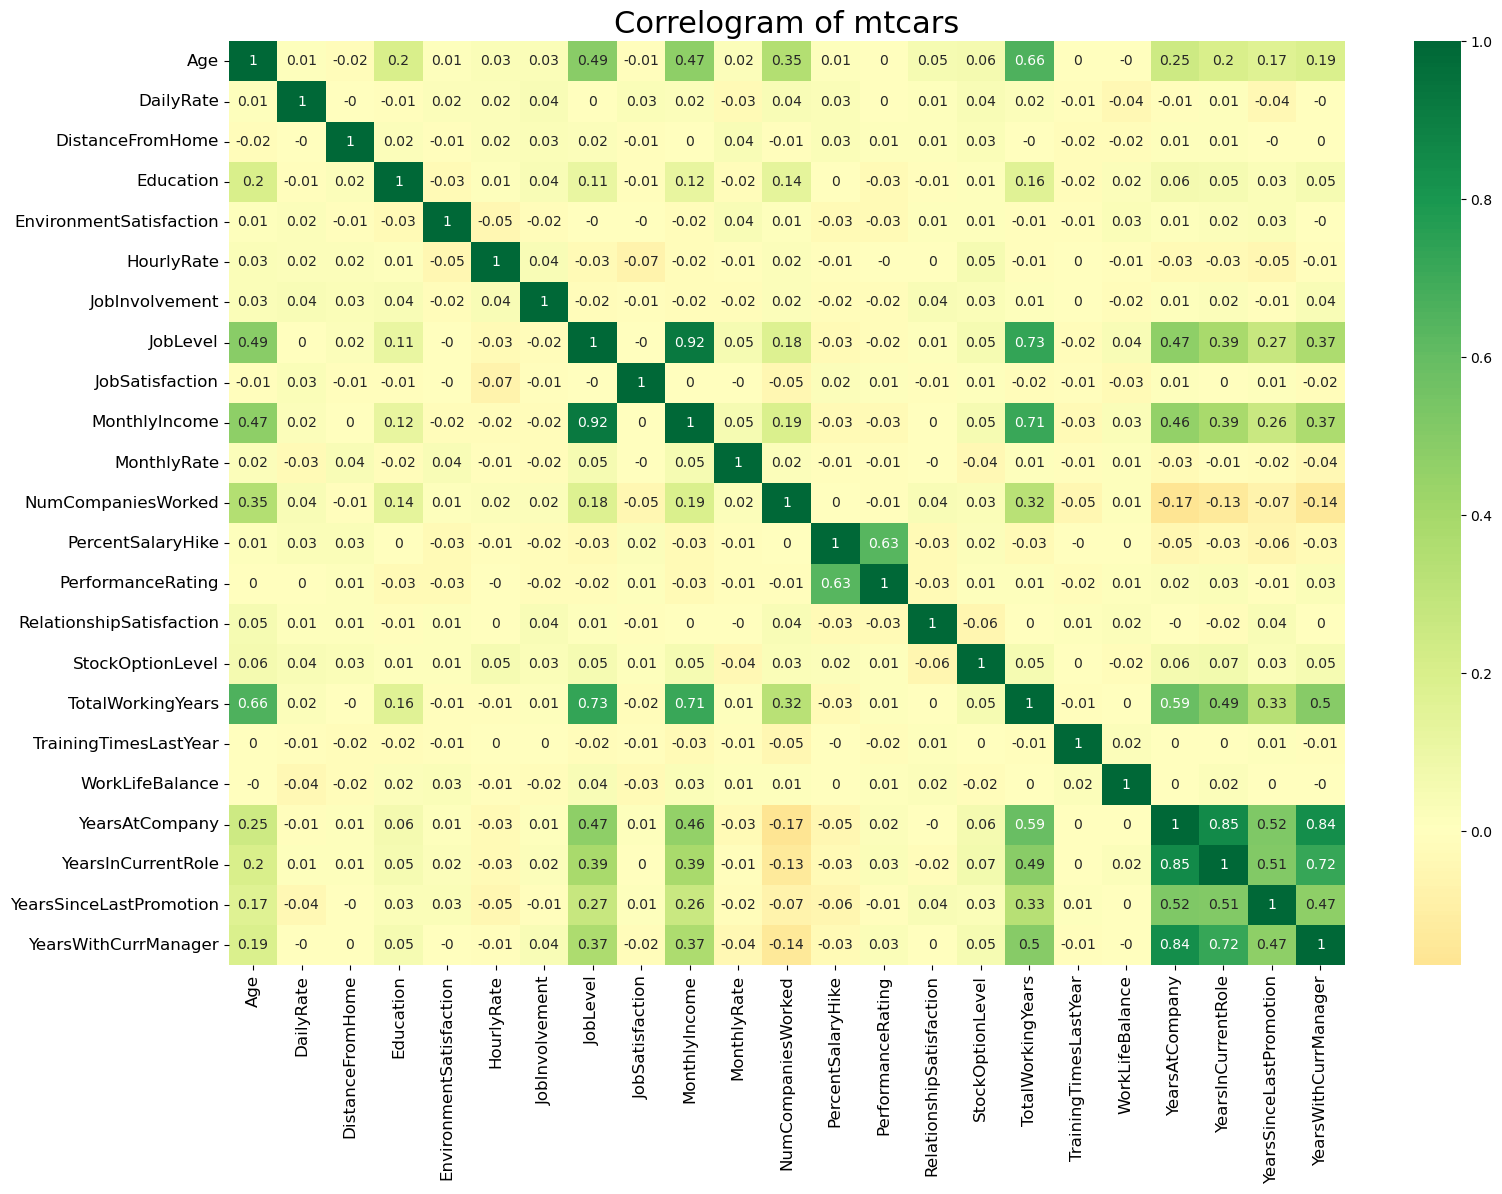

In [27]:
# Plot
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(method ='spearman').round(2), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()